In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv("base_pred_to_clf_trans.csv")

In [4]:
df.shape

(2100, 53)

In [5]:
df

,H2_mean,CO_mean,C2H4_mean,C2H2_mean,H2_median,CO_median,C2H4_median,C2H2_median,H2_cumsum,CO_cumsum,...,C2H2_log10,H2_sqrt,CO_sqrt,C2H4_sqrt,C2H2_sqrt,H2_square,CO_square,C2H4_square,C2H2_square,label
0,0.002590,0.016491,0.002876,0.000336,0.002552,0.016290,0.002775,0.000316,0.532867,3.385075,...,0.000137,0.050520,0.127631,0.052679,0.017790,6.514138e-06,0.000265,0.000008,1.001519e-07,1
1,0.002825,0.014728,0.001992,0.000339,0.002680,0.012321,0.002006,0.000338,0.536433,2.449016,...,0.000147,0.051768,0.111000,0.044793,0.018379,7.182184e-06,0.000152,0.000004,1.140931e-07,1
2,0.002764,0.017030,0.003394,0.000195,0.002620,0.015736,0.003190,0.000184,0.545830,3.228740,...,0.000080,0.051185,0.125444,0.056483,0.013569,6.863972e-06,0.000248,0.000010,3.390007e-08,1
3,0.000508,0.016334,0.004104,0.000380,0.000413,0.015559,0.003827,0.000351,0.088373,3.221250,...,0.000152,0.020317,0.124734,0.061865,0.018731,1.703885e-07,0.000242,0.000015,1.230878e-07,1
4,0.002654,0.021278,0.004068,0.000124,0.002657,0.021337,0.003687,0.000115,0.557715,4.297819,...,0.000050,0.051543,0.146071,0.060721,0.010714,7.058199e-06,0.000455,0.000014,1.317910e-08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.002549,0.009460,0.007465,0.000242,0.002521,0.005688,0.007268,0.000226,0.526535,1.183793,...,0.000098,0.050205,0.075416,0.085250,0.015047,6.353282e-06,0.000032,0.000053,5.126265e-08,1
2096,0.000915,0.005770,0.007230,0.000081,0.000747,0.005898,0.007217,0.000073,0.156884,1.131344,...,0.000032,0.027328,0.076796,0.084952,0.008557,5.577260e-07,0.000035,0.000052,5.361601e-09,3
2097,0.001565,0.002492,0.008529,0.000176,0.001288,0.002459,0.008511,0.000177,0.246234,0.498488,...,0.000077,0.035887,0.049592,0.092253,0.013296,1.658581e-06,0.000006,0.000072,3.125452e-08,3
2098,0.001688,0.020291,0.007305,0.000252,0.001573,0.018494,0.006423,0.000233,0.327876,3.942818,...,0.000101,0.039661,0.135993,0.080147,0.015265,2.474257e-06,0.000342,0.000041,5.430007e-08,1


# Подготовка выборок

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [145]:
X = df.drop("label", axis = 1).copy()
y = df["label"]

In [146]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

In [147]:
scal = StandardScaler()
x_train_scaled = scal.fit_transform(x_train)
x_test_scaled = scal.transform(x_test)

In [148]:
x_train_scaled.shape

(1680, 52)

# Базовый RF

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(x_train_scaled, y_train)
display(rfc.score(x_train_scaled, y_train))

1.0

In [20]:
print(classification_report(y_test, rfc.predict(x_test_scaled)))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98       341
           2       0.88      0.78      0.82        18
           3       0.88      0.68      0.77        22
           4       0.83      0.74      0.78        39

    accuracy                           0.95       420
   macro avg       0.89      0.80      0.84       420
weighted avg       0.94      0.95      0.95       420



In [21]:
print(classification_report(y_train, rfc.predict(x_train_scaled)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1364
           2       1.00      1.00      1.00        71
           3       1.00      1.00      1.00        91
           4       1.00      1.00      1.00       154

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680



<AxesSubplot:>

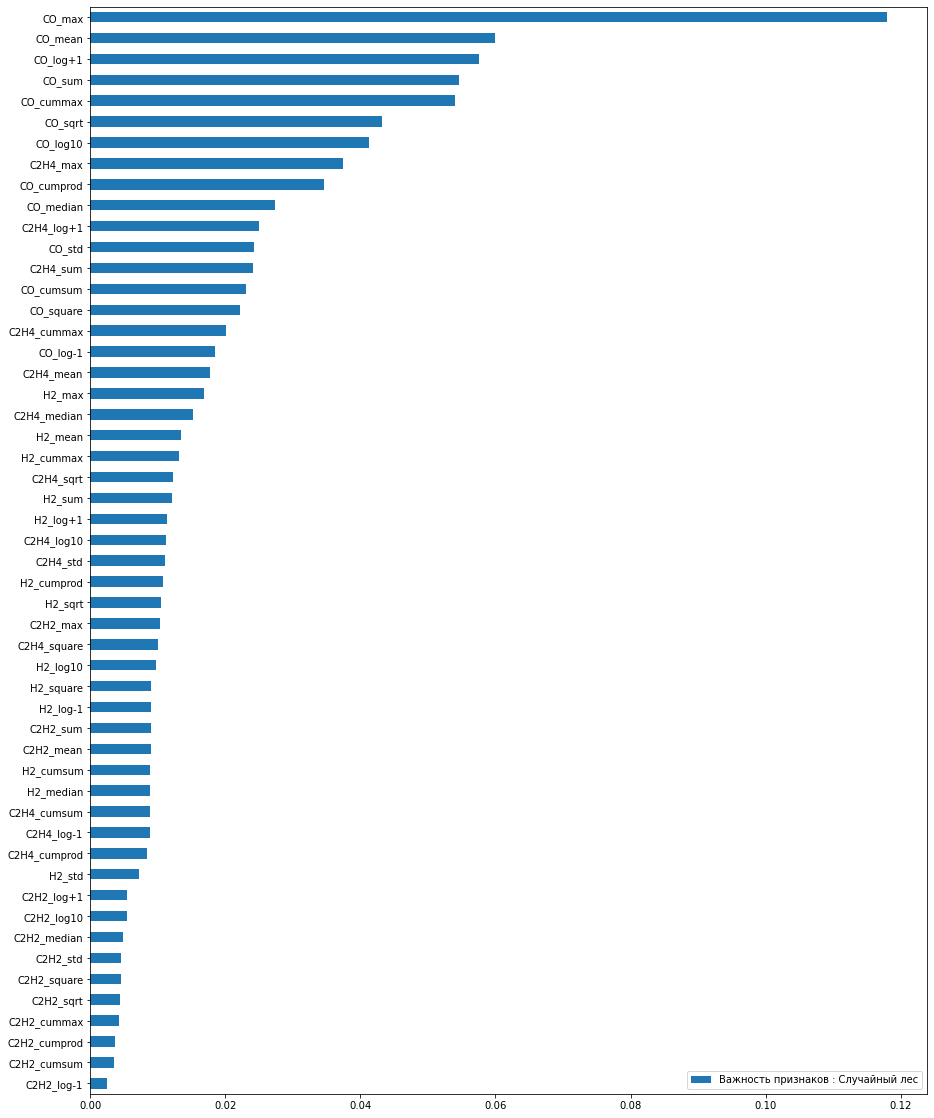

In [22]:
feature_importances_tree = rfc.feature_importances_
feature_importances_treeDf = pd.DataFrame(feature_importances_tree,
                                            index=df.drop('label', axis=1).columns,
                                            columns = ['Важность признаков : Случайный лес']).sort_values('Важность признаков : Случайный лес',ascending=True)
feature_importances_treeDf.plot.barh(figsize=(15,20))

In [23]:
feature_importances_treeDf

,Важность признаков : Случайный лес
C2H2_log-1,0.002500
C2H2_cumsum,0.003435
C2H2_cumprod,0.003654
C2H2_cummax,0.004268
C2H2_sqrt,0.004395
C2H2_square,0.004482
C2H2_std,0.004485
C2H2_median,0.004862
C2H2_log10,0.005404
C2H2_log+1,0.005429


# RandomizedSearch Base All features

In [50]:
rfc2 = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
criterion = ['gini', 'entropy']
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}
rs_base = RandomizedSearchCV(rfc2, 
                        param_dist, 
                        n_iter = 500, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=1)
rs_base.fit(x_train_scaled, y_train)
rs_base.best_params_

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


{'n_estimators': 600,
 'min_samples_split': 7,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'entropy',
 'bootstrap': True}

In [51]:
rs_base_df = pd.DataFrame(rs_base.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_base_df = rs_base_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_base_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,mean_test_score,rank_test_score
0,600,7,2,log2,10,entropy,True,0.939881,1
1,200,2,7,sqrt,7,entropy,True,0.939286,2
2,100,2,7,sqrt,10,entropy,True,0.938095,3
3,100,7,12,sqrt,10,entropy,False,0.936905,4
4,800,12,7,sqrt,7,entropy,False,0.936310,5
5,800,7,2,sqrt,8,entropy,False,0.936310,5
6,700,7,2,log2,12,gini,False,0.935714,7
7,900,7,2,sqrt,13,gini,False,0.935714,7
8,400,2,2,log2,12,entropy,False,0.935119,9
9,900,7,7,sqrt,6,gini,False,0.934524,10


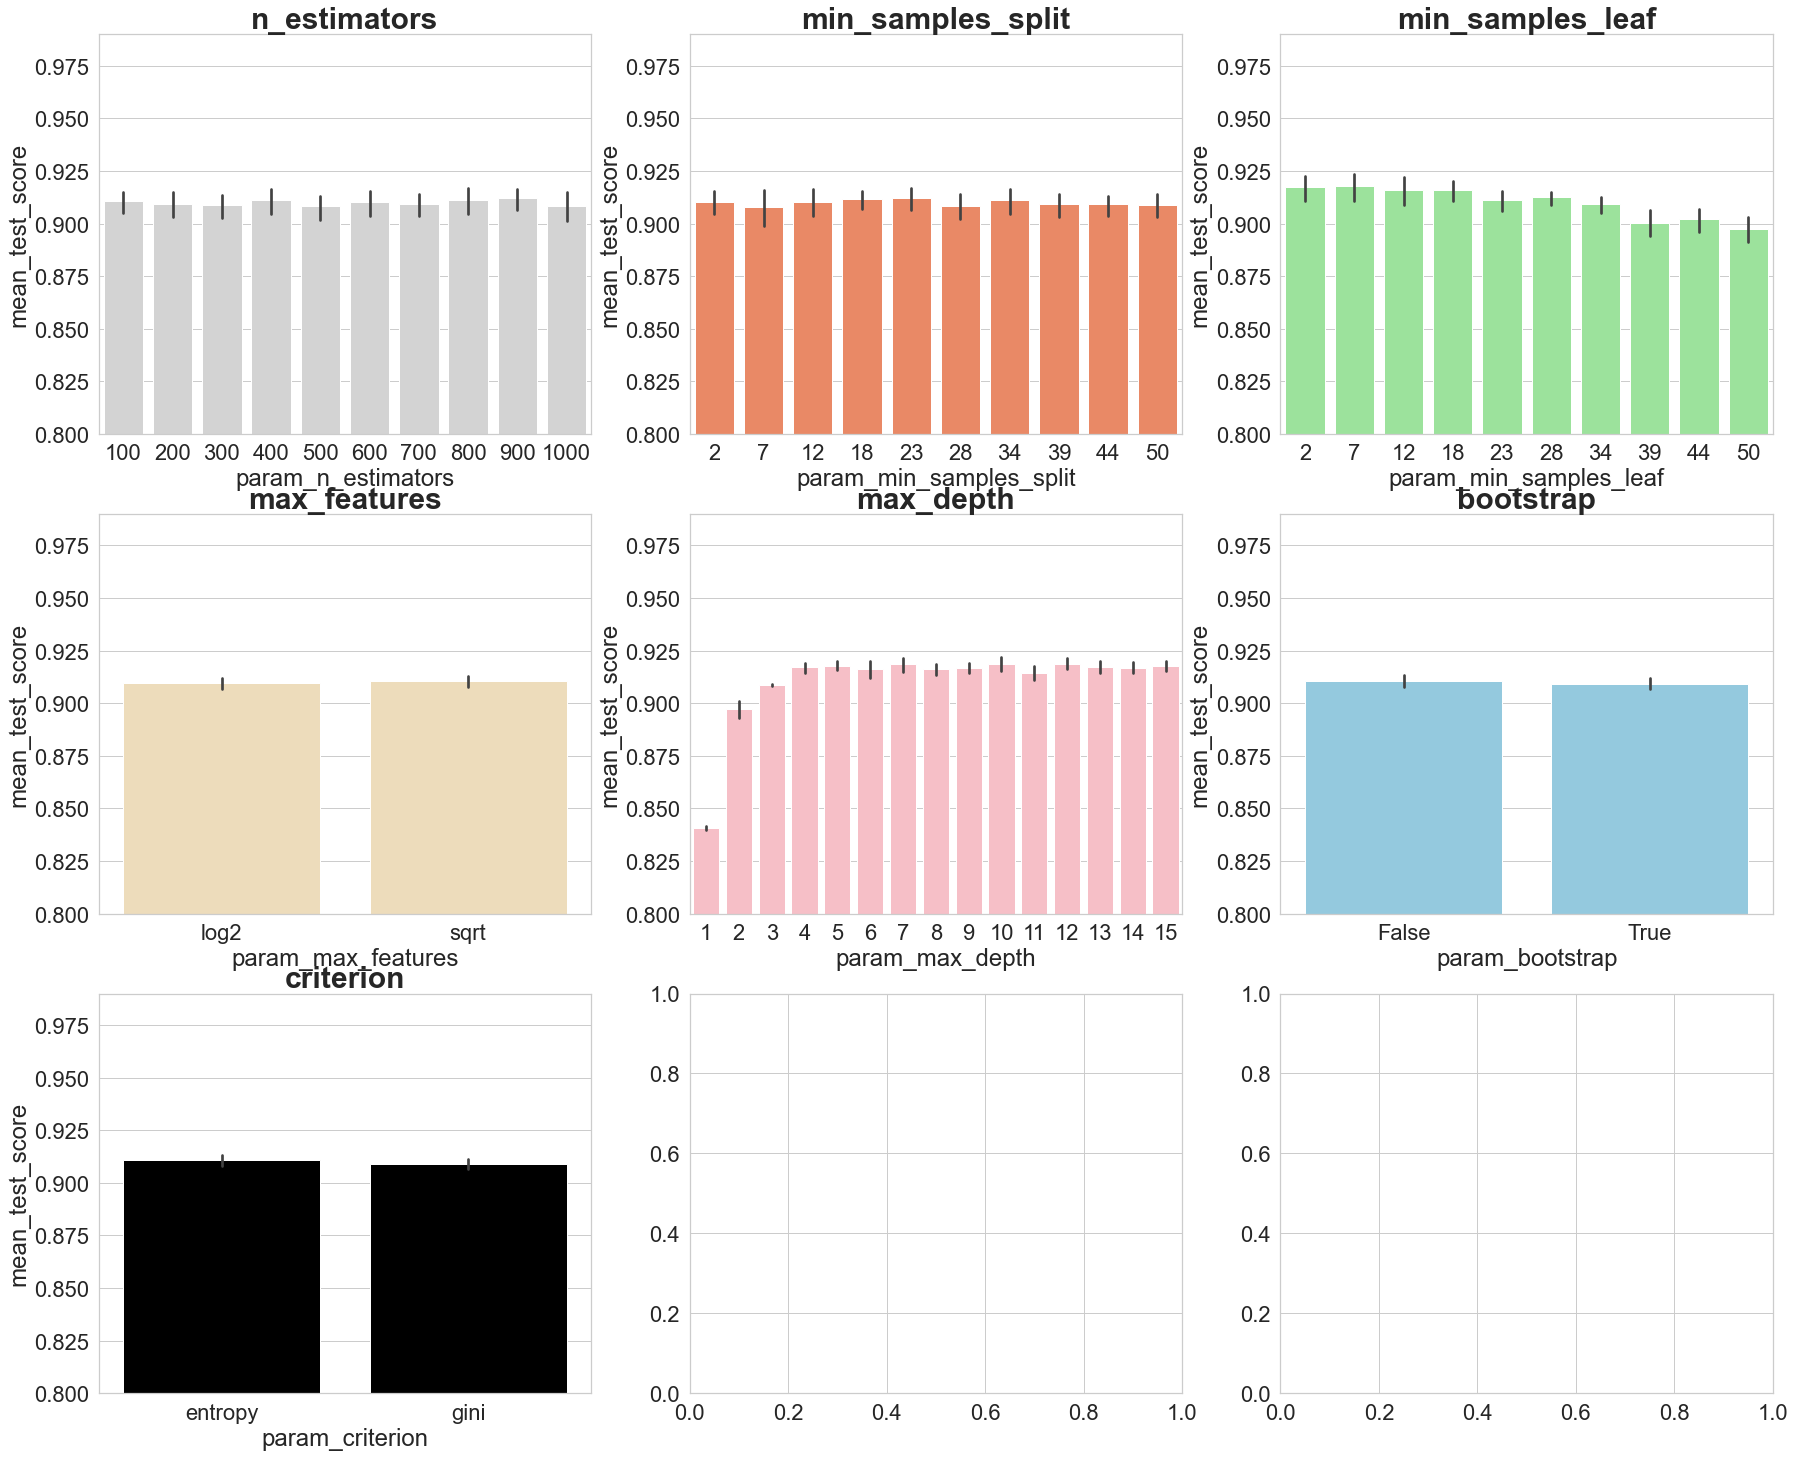

In [52]:
fig, axs = plt.subplots(ncols=3, nrows=3)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_base_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.80,.99]), axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_base_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.80,.99]), axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_base_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.80,.99]), axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_base_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.80,.99]), axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_base_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.80,.99]), axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_base_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.80,.99])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
sns.barplot(x='param_criterion',y='mean_test_score', data=rs_base_df, ax=axs[2,0], color='black')
axs[2,0].set_ylim([.80,.99])
axs[2,0].set_title(label = 'criterion', size=30, weight='bold')
plt.show()

In [55]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100,400,800, 900]
max_features = ['log2', 'sqrt']
max_depth = [4,5,7,10,12]
min_samples_split = [2,3,4,18,20,22,24,33,34,35]
min_samples_leaf = [2,3,4,5,6,7,8]
bootstrap = [False]
criterion = ['gini', 'entropy']
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}
gs2 = GridSearchCV(rfc2, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs2.fit(x_train_scaled, y_train)
rs_base2 = gs2.best_estimator_
gs2.best_params_

Fitting 3 folds for each of 5600 candidates, totalling 16800 fits


{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 100}

In [56]:
import joblib
joblib.dump(rs_base2, "RF_clf_basedf_best.pkl")

['RF_clf_basedf_best.pkl']

In [11]:
rf_basedf_best = joblib.load("RF_clf_basedf_best.pkl")

In [10]:
print(classification_report(y_test, rf_basedf_best.predict(x_test_scaled)))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98       341
           2       0.88      0.78      0.82        18
           3       0.88      0.68      0.77        22
           4       0.82      0.72      0.77        39

    accuracy                           0.95       420
   macro avg       0.89      0.79      0.83       420
weighted avg       0.94      0.95      0.94       420



<AxesSubplot:>

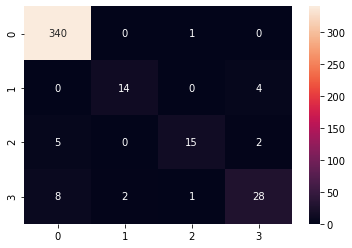

In [11]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,rf_basedf_best.predict(x_test_scaled)), annot=True, fmt="1")

## Предварительные выводы на валидационной выборке.
на 420 трансформаторов:

1) 9 раз модель определила неверный тип дефекта, что некритично;

2) 13 раз ложно выявила дефект (3,1% ложных срабатываний);

3) 1 раз не увидела дефект (0,24% вероятность пропустить дефект)


# Метод главных компонент

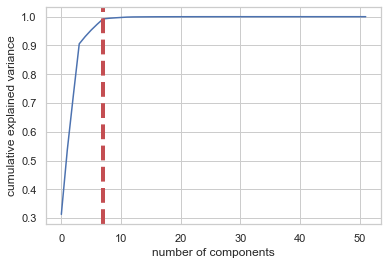

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.313005,0.313005
1,0.537148,0.224144
2,0.724280,0.187132
3,0.905700,0.181420
4,0.931038,0.025338
5,0.953559,0.022521
6,0.973616,0.020057
7,0.992373,0.018757
8,0.994567,0.002194
9,0.996046,0.001479


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=52)
pca_test.fit(x_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=7, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [17]:
columns = df.drop('label', axis=1).columns
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append(f'PCA Component {x}')
pca_test_df = pd.DataFrame(pca_test.components_, columns=columns, index=pca_dims)
pca_test_df.head(10).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9
H2_mean,0.038293,0.288685,0.015148,-0.014531,0.007084,0.014786,-0.001562,0.006819,0.001599,-0.020890
CO_mean,-0.169521,0.017810,-0.109024,-0.209083,-0.003973,0.005154,0.013220,-0.009788,0.001847,0.006488
C2H4_mean,-0.167784,0.038608,-0.120383,0.201428,-0.004432,-0.007586,0.000252,0.019435,-0.000005,-0.010580
C2H2_mean,-0.163056,0.009069,0.241023,0.007068,0.000546,0.005976,-0.015692,-0.007233,-0.004139,-0.000998
H2_median,0.038004,0.287690,0.016549,-0.014725,-0.028805,-0.059453,0.005938,-0.014638,0.003902,-0.009679
CO_median,-0.167510,0.016731,-0.109624,-0.210030,-0.042706,0.006469,-0.049956,0.024056,-0.008364,0.014054
C2H4_median,-0.165479,0.038326,-0.120496,0.203079,-0.047507,0.029352,0.000397,-0.037623,-0.015190,-0.004801
C2H2_median,-0.160664,0.007634,0.242379,0.006320,-0.044601,0.015308,0.037227,0.036052,-0.018555,0.006957
H2_cumsum,0.037921,0.287745,0.016468,-0.015043,-0.029067,-0.064034,0.003874,-0.018925,-0.000564,-0.025692
CO_cumsum,-0.165857,0.017074,-0.110600,-0.211473,-0.049240,0.009141,-0.057876,0.026225,0.005292,0.005530


In [18]:
pca = PCA(n_components=8)
pca.fit(x_train_scaled)
x_train_scaled_pca = pca.transform(x_train_scaled)
x_test_scaled_pca = pca.transform(x_test_scaled)

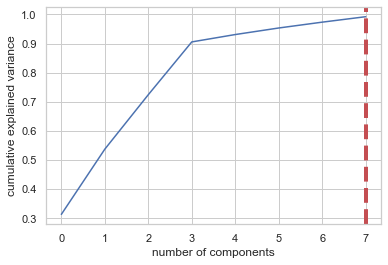

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.313005,0.313005
1,0.537148,0.224144
2,0.724280,0.187132
3,0.905700,0.181420
4,0.931038,0.025338
5,0.953559,0.022521
6,0.973616,0.020057
7,0.992373,0.018757


In [19]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=7, ymin=0, ymax=1)
display(plt.show())
evr = pca.explained_variance_ratio_
cvr = np.cumsum(pca.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [40]:
rfc_pca = RandomForestClassifier(random_state=1)
rfc_pca.fit(x_train_scaled_pca, y_train)
display(rfc.score(x_train_scaled_pca, y_train))

1.0

In [41]:
print(classification_report(y_test, rfc_pca.predict(x_test_scaled_pca)))

              precision    recall  f1-score   support

           1       0.93      0.99      0.96       341
           2       0.86      0.67      0.75        18
           3       1.00      0.27      0.43        22
           4       0.72      0.67      0.69        39

    accuracy                           0.91       420
   macro avg       0.88      0.65      0.71       420
weighted avg       0.91      0.91      0.90       420



# RandimizedSearch PCA

In [43]:
rfc_pca2 = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
criterion = ['gini', 'entropy']
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}
rs = RandomizedSearchCV(rfc_pca2, 
                        param_dist, 
                        n_iter = 500, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=1)
rs.fit(x_train_scaled_pca, y_train)
rs.best_params_

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 12,
 'criterion': 'entropy',
 'bootstrap': False}

In [44]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,mean_test_score,rank_test_score
0,400,2,2,log2,12,entropy,False,0.914881,1
1,600,7,2,log2,10,entropy,True,0.910714,2
2,700,7,2,log2,12,gini,False,0.910119,3
3,500,23,2,log2,9,entropy,False,0.904762,4
4,400,23,7,log2,14,entropy,False,0.903571,5
5,900,7,2,sqrt,13,gini,False,0.899405,6
6,900,12,7,log2,14,entropy,True,0.899405,6
7,400,34,7,log2,12,entropy,False,0.899405,6
8,700,34,7,log2,14,entropy,False,0.898810,9
9,800,12,7,log2,13,entropy,True,0.898810,9


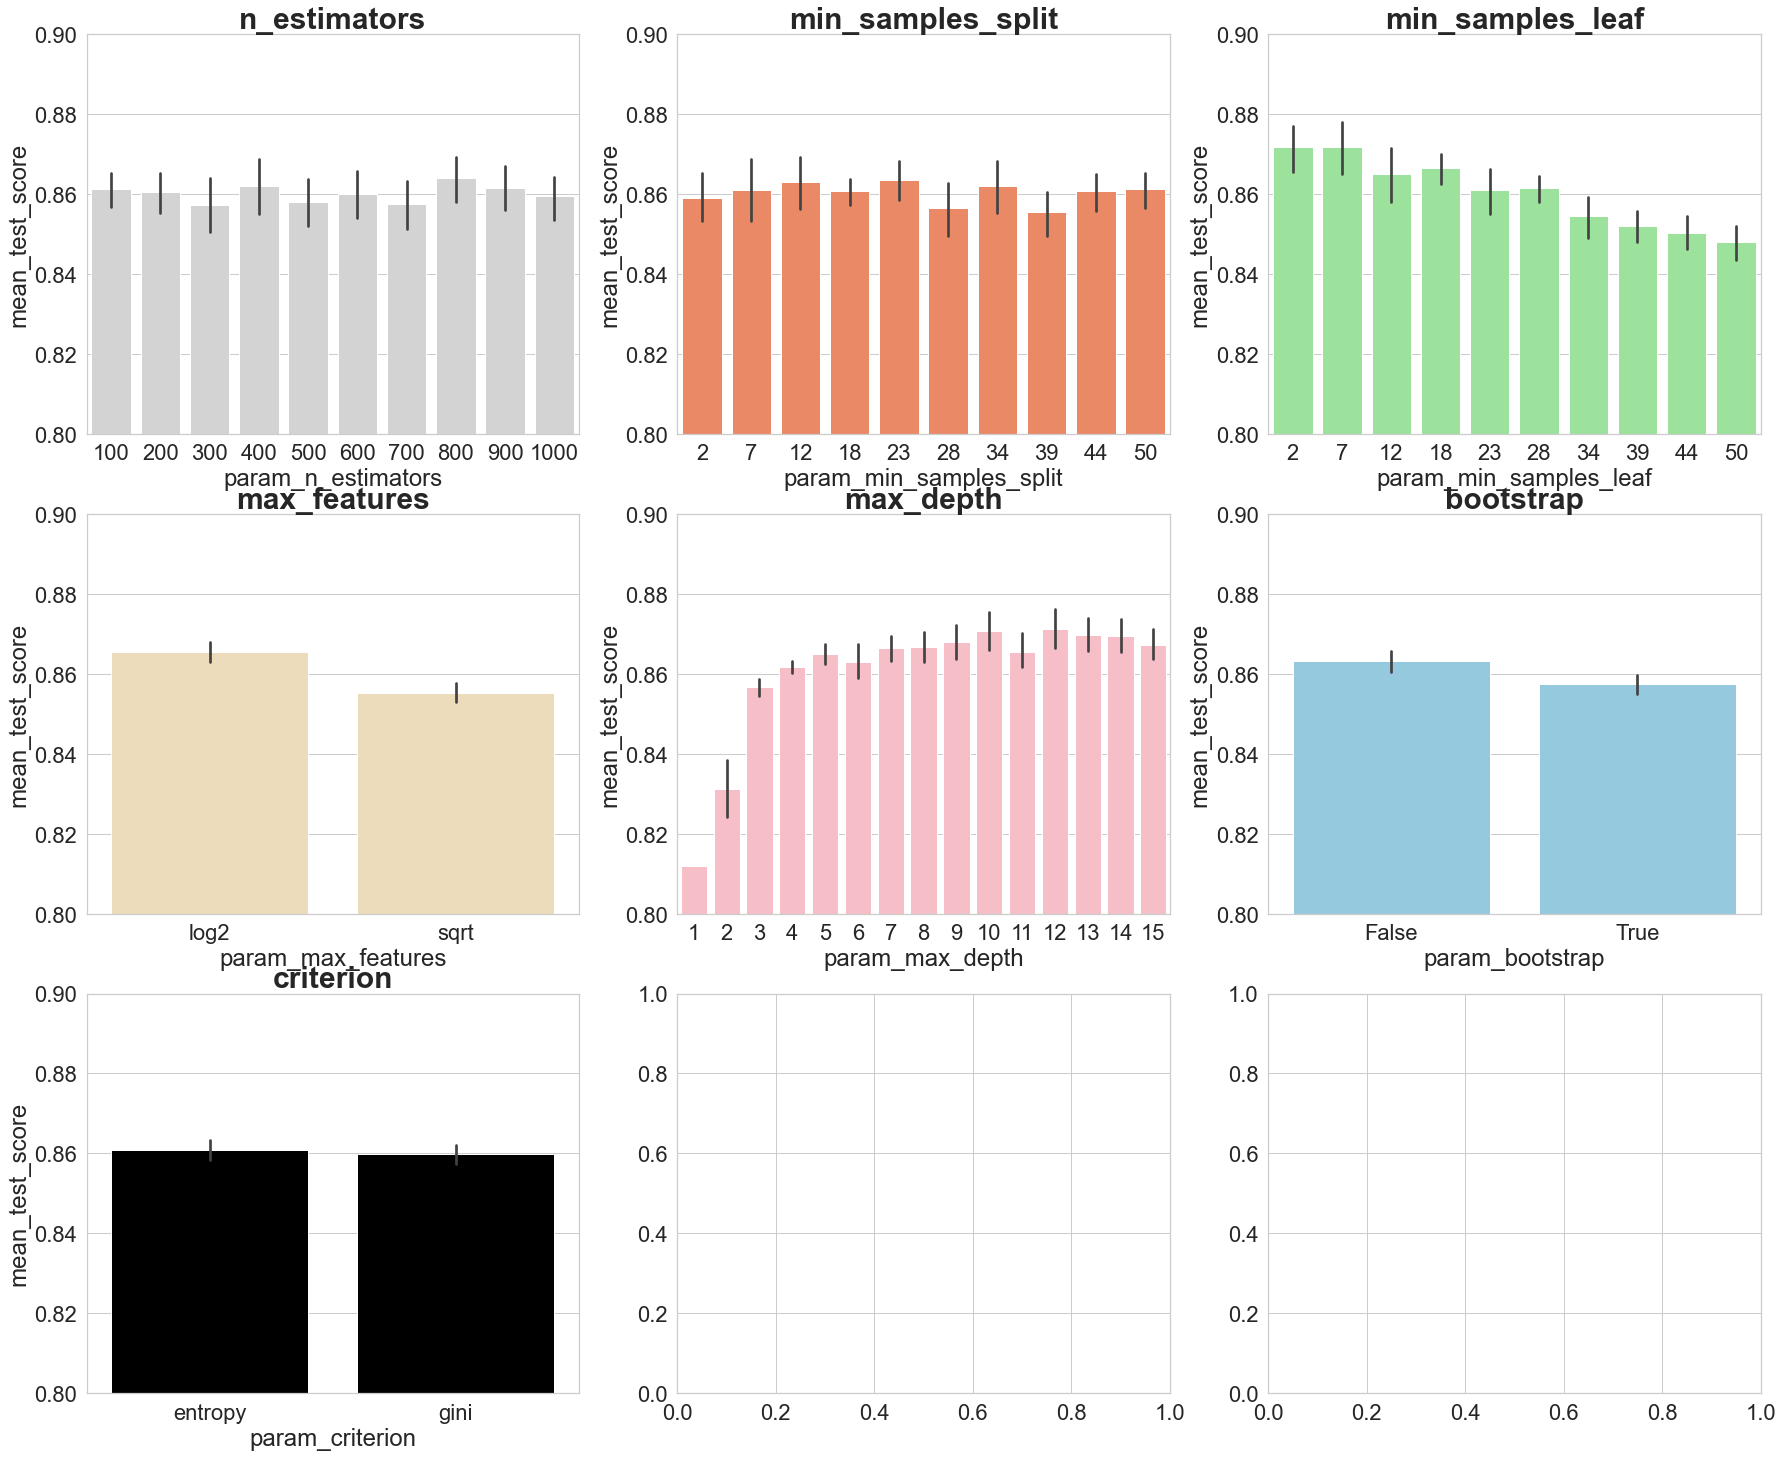

In [49]:
fig, axs = plt.subplots(ncols=3, nrows=3)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.80,.90]), axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.80,.90]), axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.80,.90]), axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.80,.90]), axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.80,.90]), axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.80,.90])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
sns.barplot(x='param_criterion',y='mean_test_score', data=rs_df, ax=axs[2,0], color='black')
axs[2,0].set_ylim([.80,.90])
axs[2,0].set_title(label = 'criterion', size=30, weight='bold')
plt.show()

# GridSearch PCA

In [53]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100,400,800]
max_features = ['log2']
max_depth = [9,10,12,13]
min_samples_split = [11,12,13, 22,23,24,33,34,35]
min_samples_leaf = [2,3,4,5,6,7,8]
bootstrap = [False]
criterion = ['gini', 'entropy']
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}
gs = GridSearchCV(rfc_pca2, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(x_train_scaled_pca, y_train)
rfc_3 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 1512 candidates, totalling 4536 fits


{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 400}

In [54]:
import joblib
joblib.dump(rfc_3, "RF_clf_PCA_best.pkl")

['RF_clf_PCA_best.pkl']

In [13]:
rf_PCA_best = joblib.load("RF_clf_PCA_best.pkl")

In [20]:
print(classification_report(y_test, rf_PCA_best.predict(x_test_scaled_pca)))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       341
           2       0.91      0.56      0.69        18
           3       0.71      0.45      0.56        22
           4       0.68      0.72      0.70        39

    accuracy                           0.91       420
   macro avg       0.81      0.68      0.73       420
weighted avg       0.91      0.91      0.91       420



<AxesSubplot:>

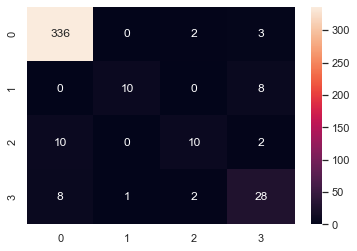

In [21]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,rf_PCA_best.predict(x_test_scaled_pca)), annot=True, fmt="1")

## Предварительные выводы на валидационной выборке.
на 420 трансформаторов:

1) 13 раз модель определила неверный тип дефекта (3.1%);

2) 18 раз ложно выявила дефект (4.3% ложных срабатываний);

3) 5 раз не увидела дефект (1.2% вероятность пропустить дефект)

При понижении размерности данных видим ухудшение работы модели.


# Feature selection

Попробуем удалить часть признаков для улучшения работы модели

<AxesSubplot:>

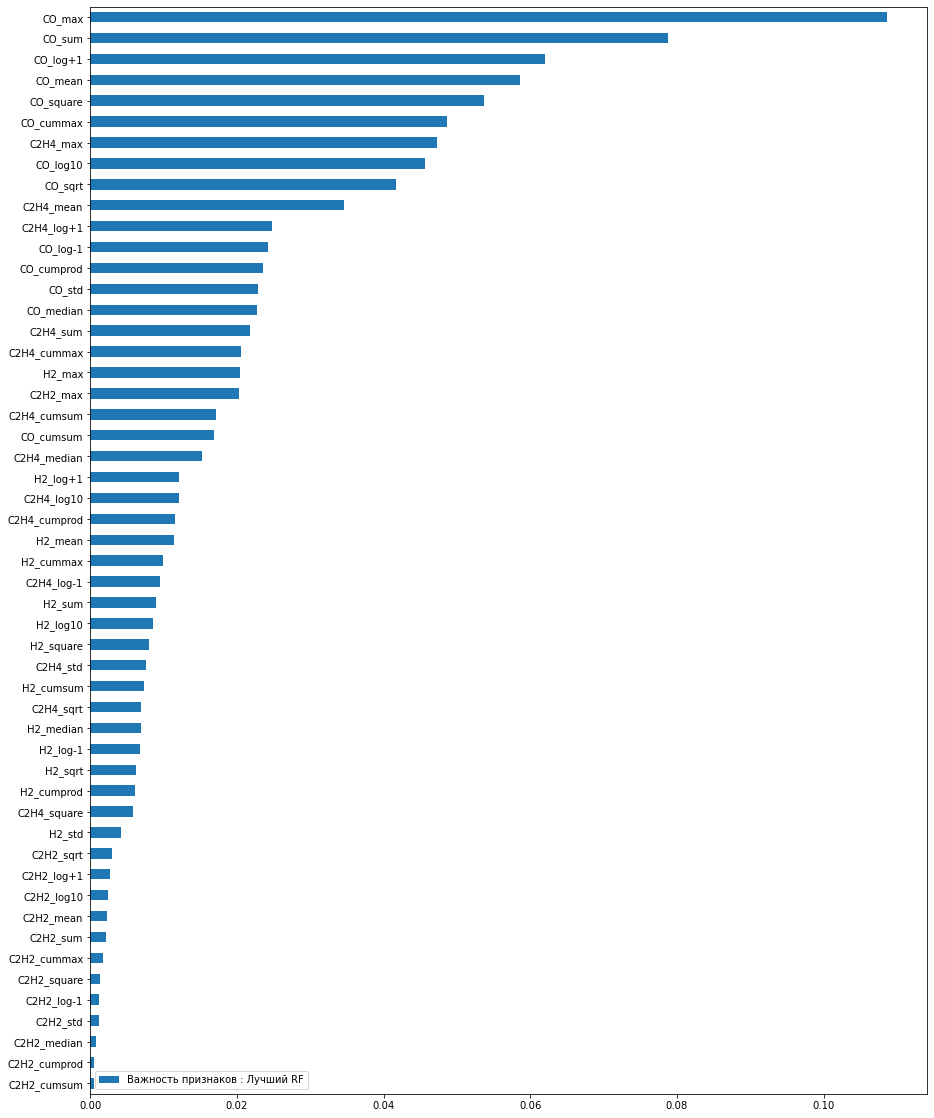

In [12]:
feature_importances_tree = rf_basedf_best.feature_importances_
feature_importances_treeDf = pd.DataFrame(feature_importances_tree,
                                            index=df.drop('label', axis=1).columns,
                                            columns = ['Важность признаков : Лучший RF']).sort_values('Важность признаков : Лучший RF',ascending=True)
feature_importances_treeDf.plot.barh(figsize=(15,20))

In [13]:
feature_importances_treeDf[feature_importances_treeDf['Важность признаков : Лучший RF'] < 0.01]

,Важность признаков : Лучший RF
C2H2_cumsum,0.000454
C2H2_cumprod,0.000521
C2H2_median,0.000772
C2H2_std,0.001136
C2H2_log-1,0.001211
C2H2_square,0.001308
C2H2_cummax,0.001674
C2H2_sum,0.002184
C2H2_mean,0.002340
C2H2_log10,0.002388


In [14]:
len(feature_importances_treeDf[feature_importances_treeDf['Важность признаков : Лучший RF'] < 0.01])

26

In [15]:
feature_importances_treeDf[feature_importances_treeDf['Важность признаков : Лучший RF'] < 0.01].index

Index(['C2H2_cumsum', 'C2H2_cumprod', 'C2H2_median', 'C2H2_std', 'C2H2_log-1',
       'C2H2_square', 'C2H2_cummax', 'C2H2_sum', 'C2H2_mean', 'C2H2_log10',
       'C2H2_log+1', 'C2H2_sqrt', 'H2_std', 'C2H4_square', 'H2_cumprod',
       'H2_sqrt', 'H2_log-1', 'H2_median', 'C2H4_sqrt', 'H2_cumsum',
       'C2H4_std', 'H2_square', 'H2_log10', 'H2_sum', 'C2H4_log-1',
       'H2_cummax'],
      dtype='object')

In [149]:
dropped_features = list(feature_importances_treeDf[feature_importances_treeDf['Важность признаков : Лучший RF'] < 0.01].index)

In [150]:
f_s_df = df.drop(dropped_features, axis=1)

In [151]:
f_s_df

,H2_mean,CO_mean,C2H4_mean,CO_median,C2H4_median,CO_cumsum,C2H4_cumsum,CO_std,H2_max,CO_max,...,C2H4_cummax,CO_cumprod,C2H4_cumprod,CO_sum,C2H4_sum,CO_log10,C2H4_log10,CO_sqrt,CO_square,label
0,0.002590,0.016491,0.002876,0.016290,0.002775,3.385075,0.577401,0.001462,0.003042,0.021299,...,0.002905,3.385075,0.577401,6.926062,1.207891,0.007018,0.001204,0.127631,0.000265,1
1,0.002825,0.014728,0.001992,0.012321,0.002006,2.449016,0.356033,0.005754,0.004002,0.028445,...,0.002003,2.449016,0.356033,6.185618,0.836560,0.005318,0.000871,0.111000,0.000152,1
2,0.002764,0.017030,0.003394,0.015736,0.003190,3.228740,0.673039,0.003381,0.003767,0.027340,...,0.003398,3.228740,0.673039,7.152616,1.425521,0.006781,0.001383,0.125444,0.000248,1
3,0.000508,0.016334,0.004104,0.015559,0.003827,3.221250,0.803408,0.002203,0.001075,0.023349,...,0.004135,3.221250,0.803408,6.860107,1.723822,0.006705,0.001659,0.124734,0.000242,1
4,0.002654,0.021278,0.004068,0.021337,0.003687,4.297819,0.739399,0.001558,0.002859,0.025213,...,0.004068,4.297819,0.739399,8.936829,1.708416,0.009169,0.001598,0.146071,0.000455,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.002549,0.009460,0.007465,0.005688,0.007268,1.183793,1.515424,0.007288,0.003017,0.026960,...,0.007636,1.183793,1.515424,3.973227,3.135170,0.002463,0.003145,0.075416,0.000032,1
2096,0.000915,0.005770,0.007230,0.005898,0.007217,1.131344,1.478994,0.000740,0.001827,0.007750,...,0.007235,1.131344,1.478994,2.423542,3.036463,0.002554,0.003123,0.076796,0.000035,3
2097,0.001565,0.002492,0.008529,0.002459,0.008511,0.498488,1.736177,0.000477,0.003281,0.004190,...,0.008534,0.498488,1.736177,1.046765,3.582290,0.001067,0.003681,0.049592,0.000006,3
2098,0.001688,0.020291,0.007305,0.018494,0.006423,3.942818,1.369071,0.003302,0.002582,0.029903,...,0.007305,3.942818,1.369071,8.522143,3.068074,0.007958,0.002781,0.135993,0.000342,1


In [152]:
fs_X = f_s_df.drop("label", axis = 1).copy()
y = df["label"]

fs_x_train, fs_x_test, fs_y_train, fs_y_test = train_test_split(fs_X, y, test_size = 0.2, random_state = 1, stratify = y)

scal = StandardScaler()
fs_x_train_scaled = scal.fit_transform(fs_x_train)
fs_x_test_scaled = scal.transform(fs_x_test)

fs_x_train_scaled.shape

(1680, 26)

# RandomizedSearch Base feature selected

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc4 = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
criterion = ['gini', 'entropy']
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}
rs_base_fs = RandomizedSearchCV(rfc4, 
                        param_dist, 
                        n_iter = 300, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=1)
rs_base_fs.fit(fs_x_train, fs_y_train)
rs_base_fs.best_params_

Fitting 3 folds for each of 300 candidates, totalling 900 fits


{'n_estimators': 800,
 'min_samples_split': 7,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'entropy',
 'bootstrap': False}

In [40]:
rs_base_fs_df = pd.DataFrame(rs_base_fs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_base_fs_df = rs_base_fs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_base_fs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,mean_test_score,rank_test_score
0,800,7,2,sqrt,8,entropy,False,0.939286,1
1,100,2,7,sqrt,10,entropy,True,0.938095,2
2,400,2,2,log2,12,entropy,False,0.937500,3
3,600,7,2,log2,10,entropy,True,0.937500,3
4,700,7,2,log2,12,gini,False,0.935119,5
5,900,7,7,sqrt,6,gini,False,0.934524,6
6,400,12,2,sqrt,8,gini,False,0.933929,7
7,900,7,2,sqrt,13,gini,False,0.933929,7
8,600,28,12,sqrt,12,entropy,False,0.933333,9
9,100,7,12,sqrt,10,entropy,False,0.933333,9


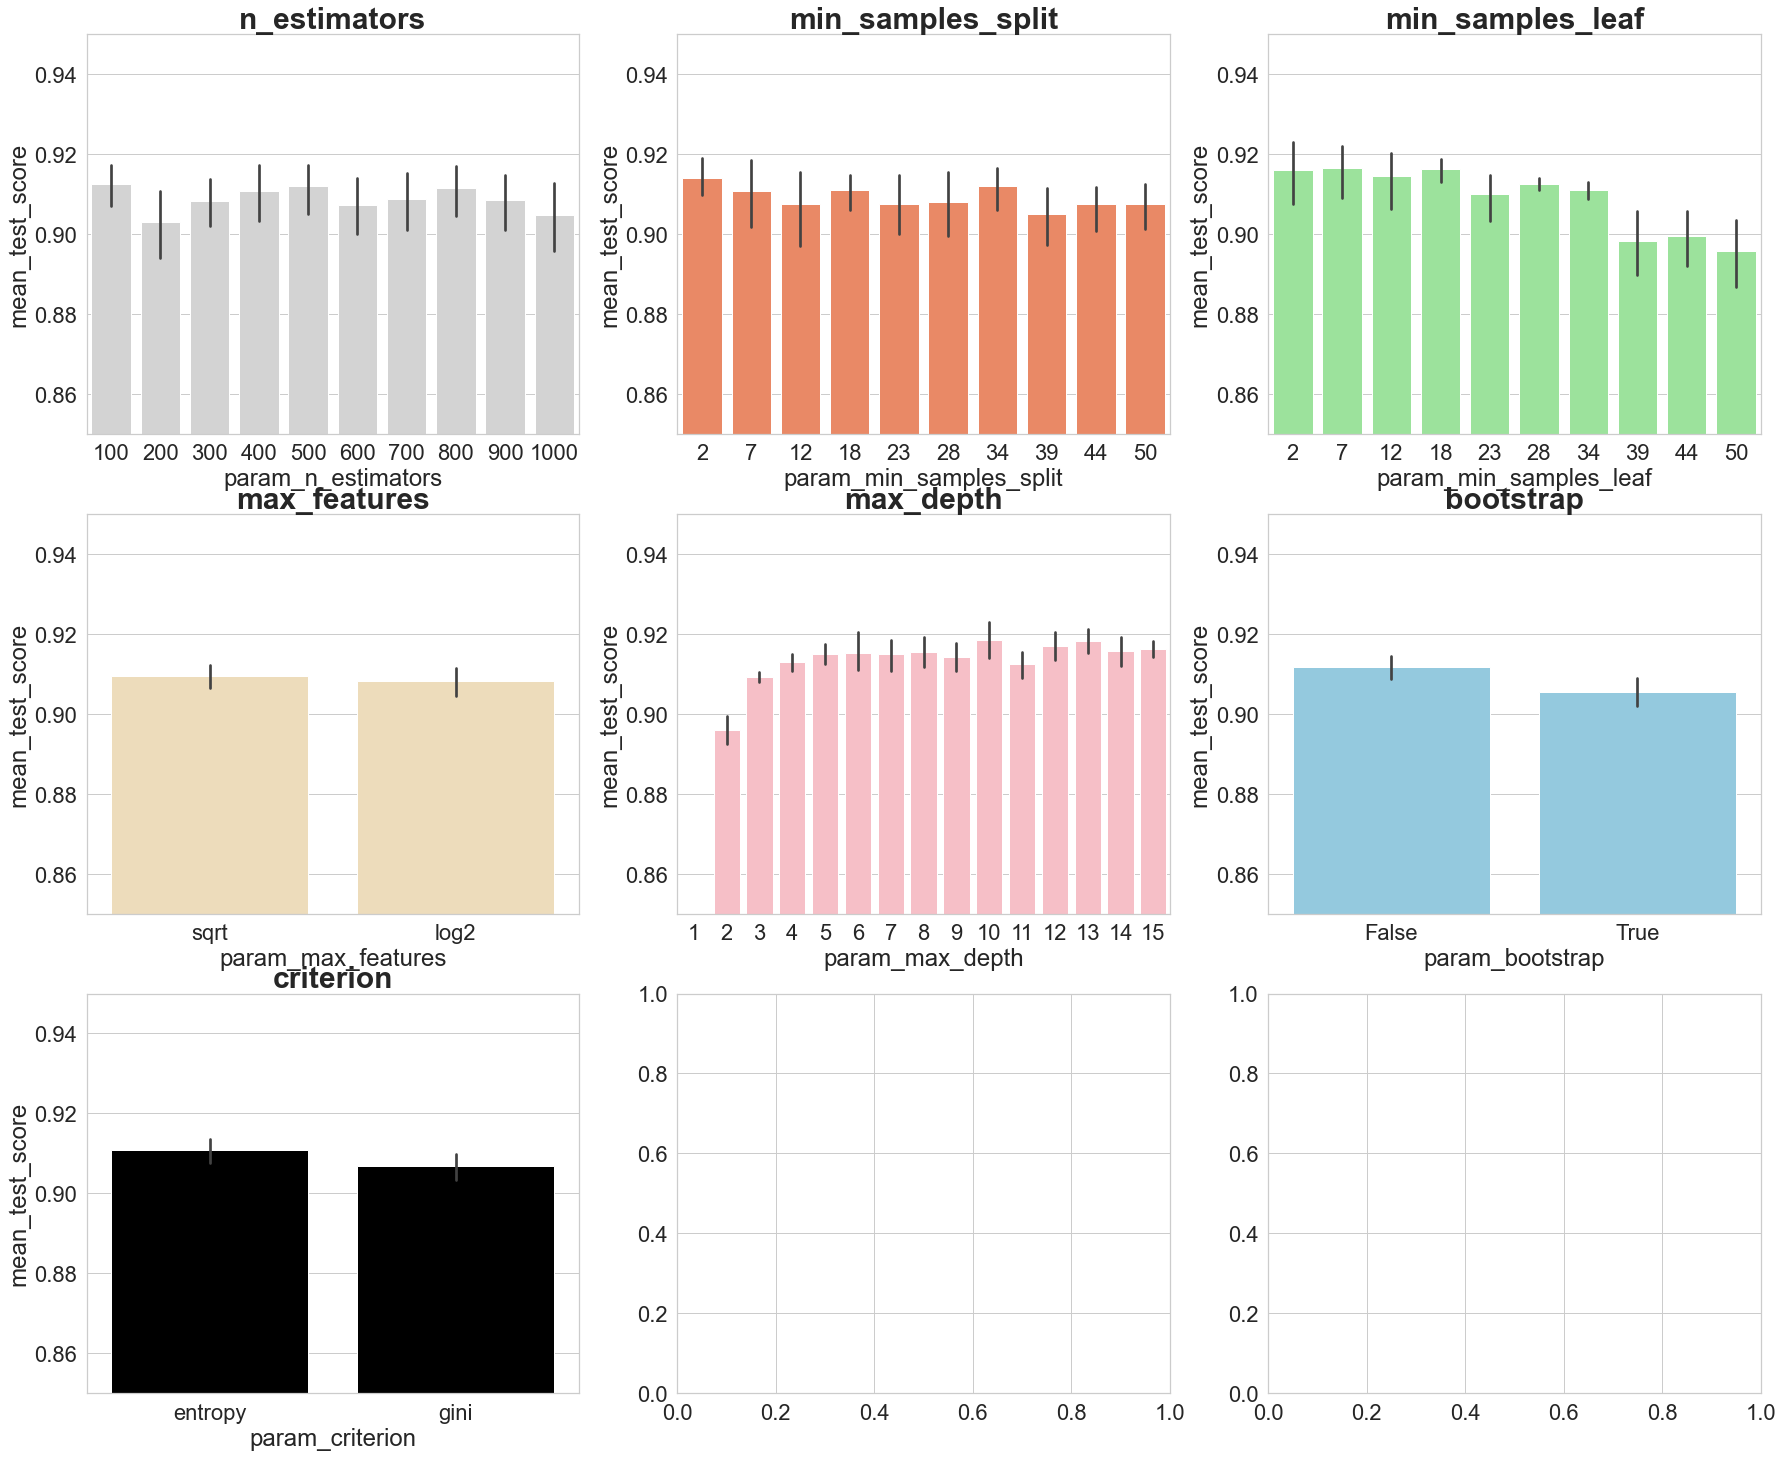

In [42]:
fig, axs = plt.subplots(ncols=3, nrows=3)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_base_fs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.85,.95]), axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_base_fs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.85,.95]), axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_base_fs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.85,.95]), axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_base_fs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.85,.95]), axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_base_fs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.85,.95]), axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_base_fs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.85,.95])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
sns.barplot(x='param_criterion',y='mean_test_score', data=rs_base_fs_df, ax=axs[2,0], color='black')
axs[2,0].set_ylim([.85,.95])
axs[2,0].set_title(label = 'criterion', size=30, weight='bold')
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV
rfc4 = RandomForestClassifier()
n_estimators = [100,500]
max_features = ['log2', 'sqrt']
max_depth = [10,12,13]
min_samples_split = [2,3,4,5]
min_samples_leaf = [2,3,4,5,6,7,17,18,19]
bootstrap = [False]
criterion = ['entropy']
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}
gs3 = GridSearchCV(rfc4, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs3.fit(fs_x_train, fs_y_train)
rs_base_fs = gs3.best_estimator_
gs3.best_params_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 100}

In [24]:
import joblib
joblib.dump(rs_base_fs, "RF_clf_fs_df_best.pkl")

['RF_clf_fs_df_best.pkl']

In [25]:
rf_fs_best = joblib.load("RF_clf_fs_df_best.pkl")

In [26]:
print(classification_report(y_test, rf_fs_best.predict(fs_x_test)))

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       341
           2       0.88      0.78      0.82        18
           3       0.88      0.68      0.77        22
           4       0.78      0.74      0.76        39

    accuracy                           0.94       420
   macro avg       0.88      0.80      0.83       420
weighted avg       0.94      0.94      0.94       420



<AxesSubplot:>

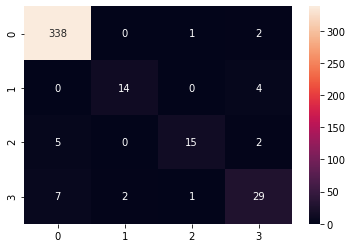

In [27]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,rf_fs_best.predict(fs_x_test)), annot=True, fmt="1")

In [28]:
from sklearn.model_selection import GridSearchCV
rfc5 = RandomForestClassifier()
n_estimators = [100]
max_features = ['log2', 'sqrt']
max_depth = [6,7,8,9,10,11,12,13,14,15,16]
min_samples_split = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
min_samples_leaf = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
bootstrap = [False,True]
criterion = ['entropy', 'gini']
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}
gs4 = GridSearchCV(rfc5, param_grid, cv = 4, verbose = 1, n_jobs=-1)
gs4.fit(fs_x_train, fs_y_train)
rs_base_fs2 = gs4.best_estimator_
gs4.best_params_

Fitting 4 folds for each of 33000 candidates, totalling 132000 fits


{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 11,
 'n_estimators': 100}

In [29]:
import joblib
joblib.dump(rs_base_fs2, "RF_clf_fs_df_best2.pkl")

['RF_clf_fs_df_best2.pkl']

In [30]:
rf_fs_best2 = joblib.load("RF_clf_fs_df_best2.pkl")

In [31]:
print(classification_report(y_test, rf_fs_best2.predict(fs_x_test)))

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       341
           2       0.88      0.78      0.82        18
           3       0.88      0.68      0.77        22
           4       0.79      0.77      0.78        39

    accuracy                           0.95       420
   macro avg       0.88      0.81      0.84       420
weighted avg       0.94      0.95      0.94       420



<AxesSubplot:>

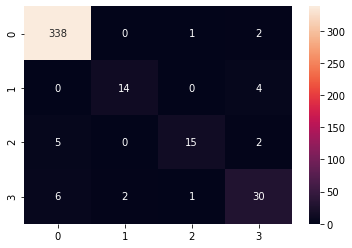

In [32]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,rf_fs_best2.predict(fs_x_test)), annot=True, fmt="1")

## Предварительные выводы на валидационной выборке.
на 420 трансформаторов:

1) 9 раз модель определила неверный тип дефекта (2.1%);

2) 11 раз ложно выявила дефект (2.6% ложных срабатываний);

3) 3 раз не увидела дефект (0.7% вероятность пропустить дефект)

Исключение признаков оказало незначительное положительное влияние на работу модели


In [33]:
rs_base_fs2_df = pd.DataFrame(gs4.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_base_fs2_df = rs_base_fs2_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_base_fs2_df.head(10)

,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,split3_test_score,mean_test_score,rank_test_score
0,False,entropy,12,sqrt,2,11,100,0.928571,0.948810,1
1,False,entropy,8,sqrt,6,8,100,0.933333,0.947619,2
2,False,entropy,10,sqrt,5,12,100,0.933333,0.947619,2
3,False,entropy,9,sqrt,4,11,100,0.933333,0.947619,2
4,False,entropy,13,sqrt,5,7,100,0.930952,0.947024,5
5,False,entropy,12,sqrt,3,12,100,0.930952,0.947024,5
6,False,entropy,13,sqrt,3,9,100,0.935714,0.947024,5
7,True,entropy,14,sqrt,2,7,100,0.928571,0.947024,5
8,False,entropy,15,sqrt,2,14,100,0.938095,0.947024,5
9,False,entropy,9,sqrt,5,4,100,0.938095,0.947024,5


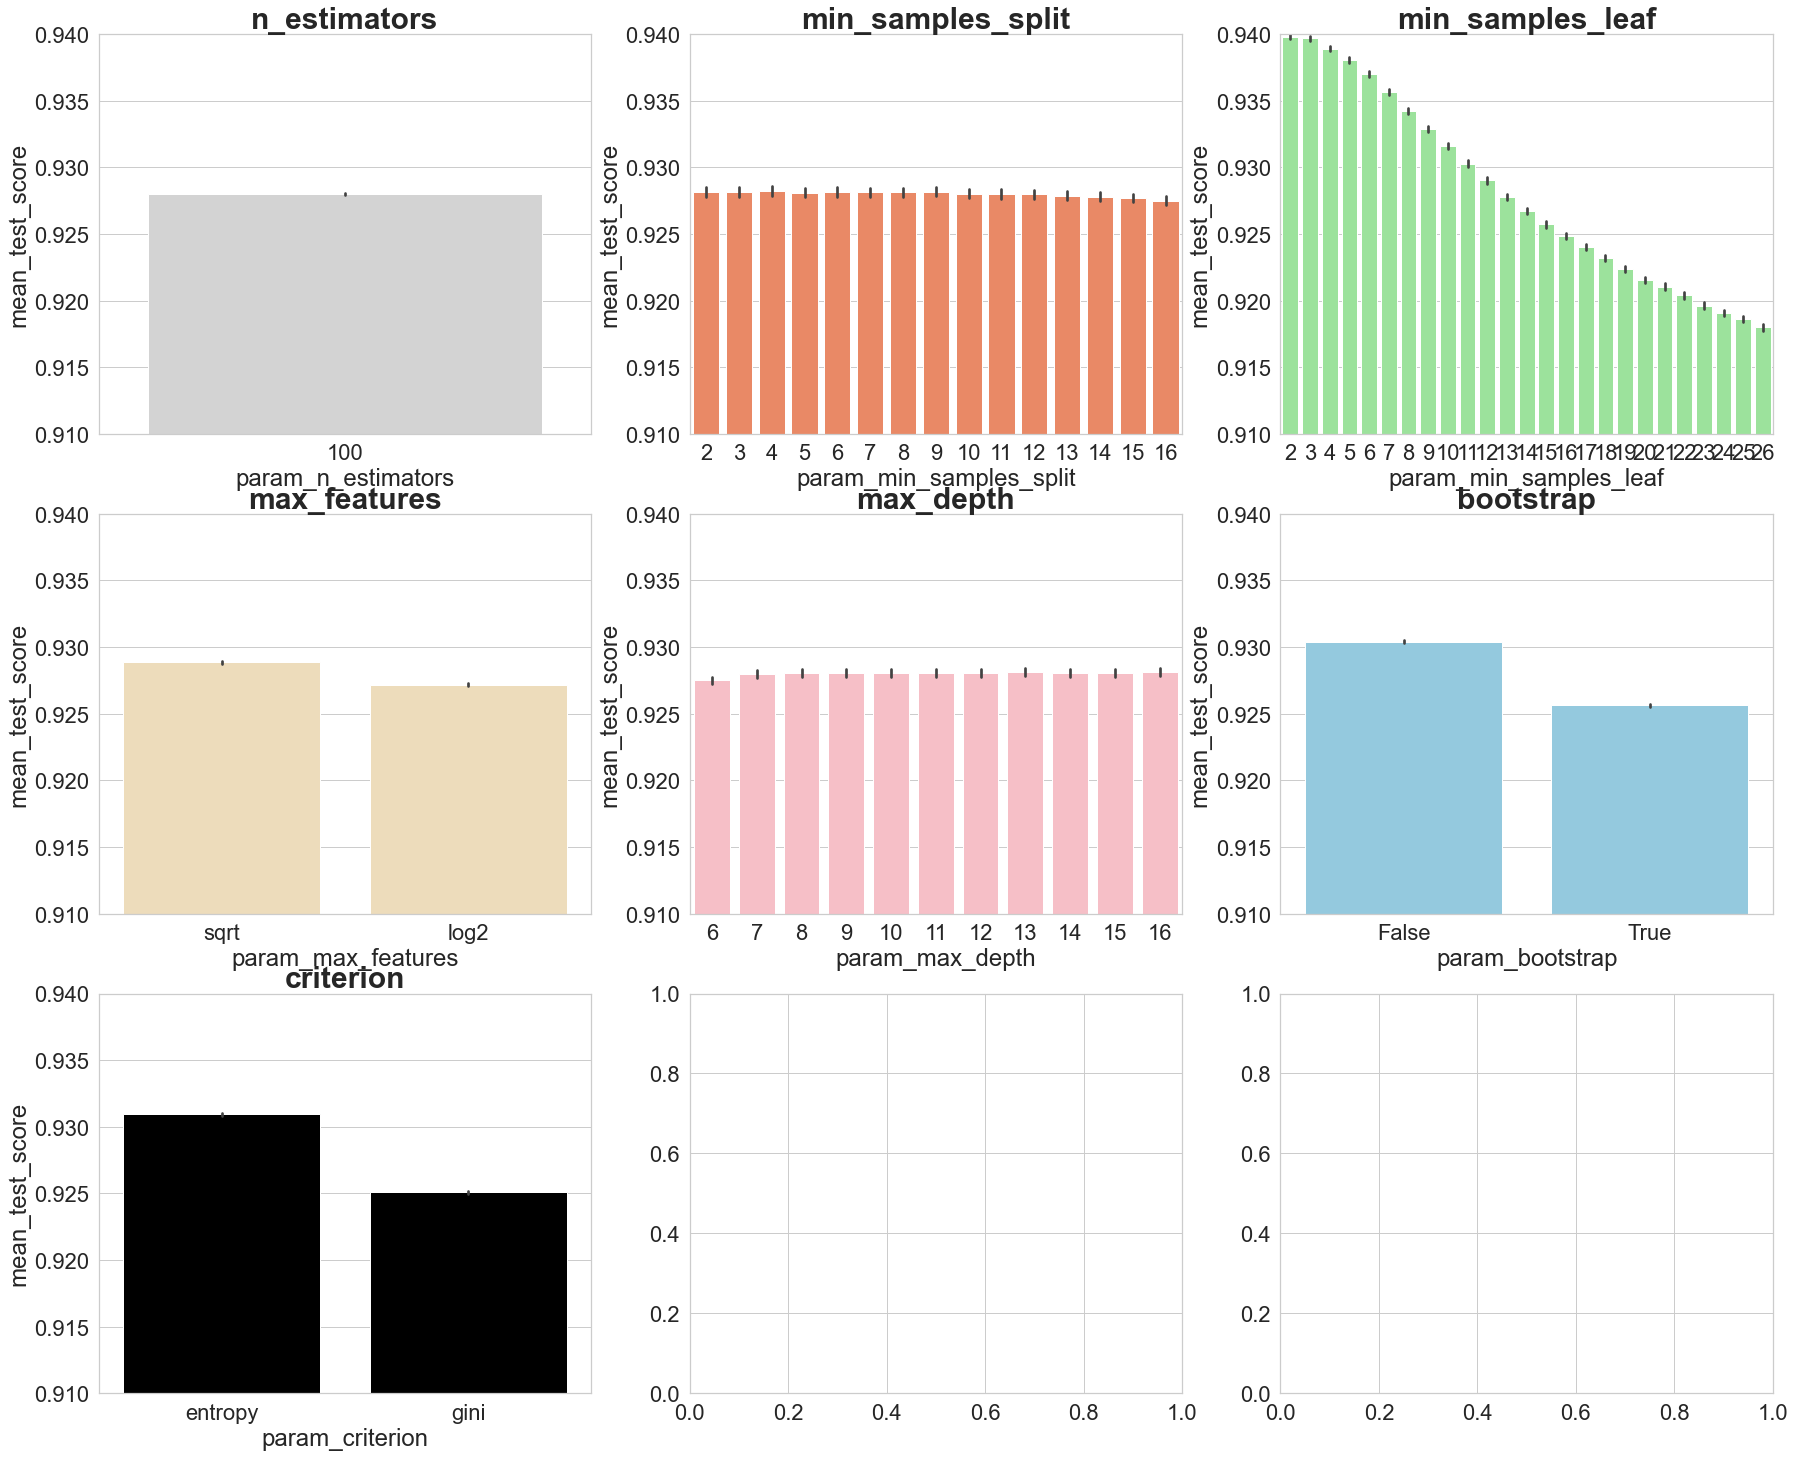

In [35]:
fig, axs = plt.subplots(ncols=3, nrows=3)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_base_fs2_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.91,.94]), axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_base_fs2_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.91,.94]), axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_base_fs2_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.91,.94]), axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_base_fs2_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.91,.94]), axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_base_fs2_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.91,.94]), axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_base_fs2_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.91,.94])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
sns.barplot(x='param_criterion',y='mean_test_score', data=rs_base_fs2_df, ax=axs[2,0], color='black')
axs[2,0].set_ylim([.91,.94])
axs[2,0].set_title(label = 'criterion', size=30, weight='bold')
plt.show()

# Сравнение моделей

In [102]:
rf_basedf_best = joblib.load("RF_clf_basedf_best.pkl")
rf_fs_best = joblib.load("RF_clf_fs_df_best2.pkl")

In [38]:
print("Случайный лес")
print("Все признаки")
print(classification_report(y_test, rf_basedf_best.predict(x_test_scaled)))

Случайный лес
Все признаки
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       341
           2       0.88      0.78      0.82        18
           3       0.88      0.68      0.77        22
           4       0.82      0.72      0.77        39

    accuracy                           0.95       420
   macro avg       0.89      0.79      0.83       420
weighted avg       0.94      0.95      0.94       420



In [39]:
print("Случайный лес")
print("Отобранные признаки")
print(classification_report(y_test, rf_fs_best.predict(fs_x_test)))

Случайный лес
Отобранные признаки
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       341
           2       0.88      0.78      0.82        18
           3       0.88      0.68      0.77        22
           4       0.79      0.77      0.78        39

    accuracy                           0.95       420
   macro avg       0.88      0.81      0.84       420
weighted avg       0.94      0.95      0.94       420



Случайный лес
Все признаки


<AxesSubplot:>

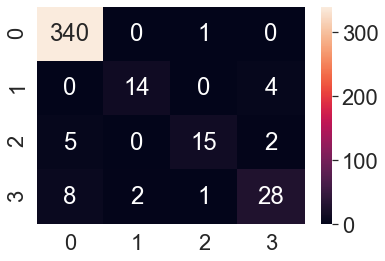

In [40]:
print("Случайный лес")
print("Все признаки")
sns.heatmap(confusion_matrix(y_test,rf_basedf_best.predict(x_test_scaled)), annot=True, fmt="1")

Случайный лес
Отобранные признаки


<AxesSubplot:>

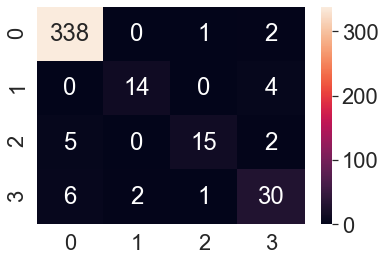

In [41]:
print("Случайный лес")
print("Отобранные признаки")
sns.heatmap(confusion_matrix(y_test,rf_fs_best.predict(fs_x_test)), annot=True, fmt="1")

### Выводы по матрицам ошибок

Модели очень близки по качеству. Различия следующие:

1) Первая модель пропускает меньше всего дефектов (1 на 420 трансформаторов против 3х у второй модели)

2) Однако первая модель чаще дает ложное указание на дефект (3,1% от всех измерений или 20% от всех указаний на дефект моделью - против 2,6% и 16% у второй модели, соответственно)

Сравним так же ROC-кривые моделей

In [161]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

# ROC-кривые по бинарным меткам

In [162]:
X = df.drop("label", axis = 1).copy()
y = df["label"]
y = label_binarize(y, classes=[1, 2, 3, 4])

In [163]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

scal = StandardScaler()
x_train_scaled = scal.fit_transform(x_train)
x_test_scaled = scal.transform(x_test)

x_train_scaled.shape

(1680, 52)

In [164]:
fs_X = f_s_df.drop("label", axis = 1).copy()
y = df["label"]
y = label_binarize(y, classes=[1, 2, 3, 4])

fs_x_train, fs_x_test, fs_y_train, fs_y_test = train_test_split(fs_X, y, test_size = 0.2, random_state = 1, stratify = y)

scal = StandardScaler()
fs_x_train_scaled = scal.fit_transform(fs_x_train)
fs_x_test_scaled = scal.transform(fs_x_test)

fs_x_train_scaled.shape

(1680, 26)

In [165]:
params1 = rf_basedf_best.get_params()
params2 = rf_fs_best.get_params()


In [166]:
rf_fs_best.fit(fs_x_train, fs_y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=12,
                       max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=11)

In [167]:
rf_basedf_best.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=7,
                       max_features='sqrt', min_samples_leaf=7)

In [168]:
rf_basedf_best.classes_

[array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1])]

In [169]:
n_classes = y.shape[1]

## Все признаки (бинарные метки)

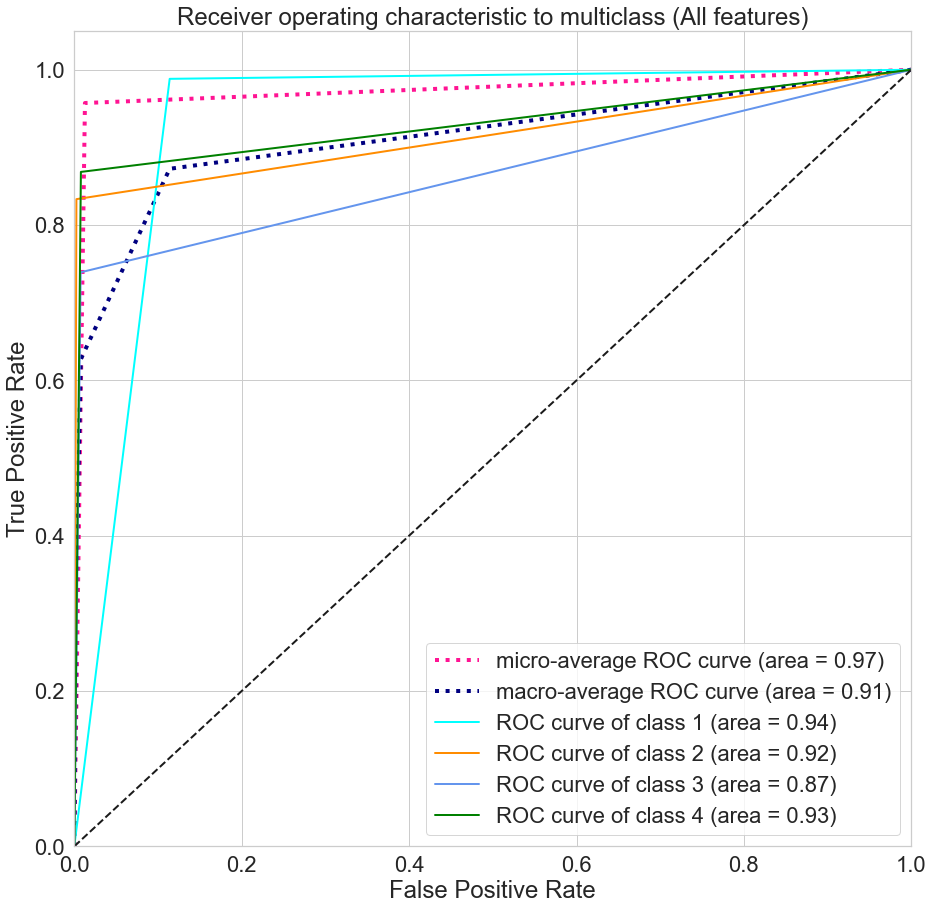

In [173]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], rf_basedf_best.predict(x_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), rf_basedf_best.predict(x_test).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(15,15))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
lw=2
colors = cycle(["aqua", "darkorange", "cornflowerblue", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i+1, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic to multiclass (All features)")
plt.legend(loc="lower right")
plt.show()

## Отобранные признаки (бинарные метки)

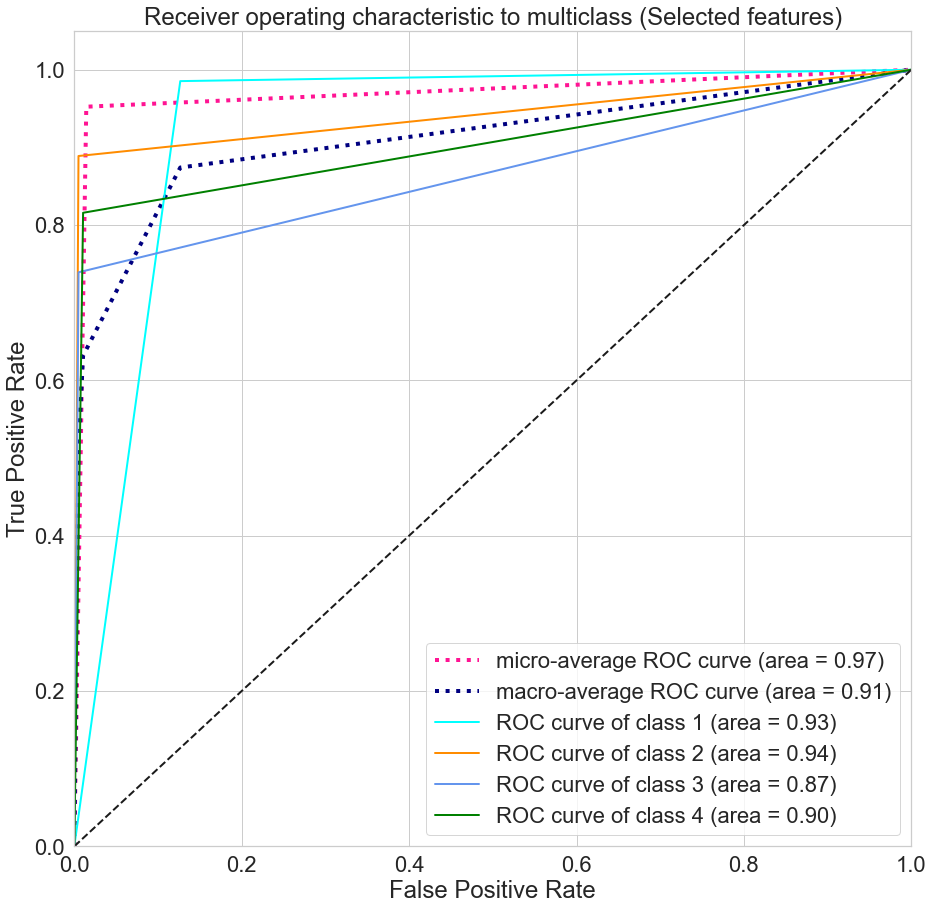

In [172]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(fs_y_test[:, i], rf_fs_best.predict(fs_x_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(fs_y_test.ravel(), rf_fs_best.predict(fs_x_test).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(15,15))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
lw=2
colors = cycle(["aqua", "darkorange", "cornflowerblue", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i+1, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic to multiclass (Selected features)")
plt.legend(loc="lower right")
plt.show()

По ROC-кривым видим, что по метрике ROC-AUC вторая модель выглядит немного лучше.

Однако, с учетом анализа матриц ошибок, как самостоятельную модель примем решение использовать первую модель, отлаженную на всех выделенных статистических характеристиках.

В дальнейшем при ансамблировании вернемся к обеим моделям.

In [1]:
import nbformat as nbf
from glob import glob

import uuid
def get_cell_id(id_length=8):
    return uuid.uuid4().hex[:id_length]

# your notebook name/keyword
nb_name = 'MLP_clf_tunning'
notebooks = list(filter(lambda x: nb_name in x, glob("./*.ipynb", recursive=True)))

# iterate over notebooks
for ipath in sorted(notebooks):
    # load notebook
    ntbk = nbf.read(ipath, nbf.NO_CONVERT)
    
    cell_ids = []
    for cell in ntbk.cells:
        cell_ids.append(cell['id'])

    # reset cell ids if there are duplicates
    if not len(cell_ids) == len(set(cell_ids)): 
        for cell in ntbk.cells:
            cell['id'] = get_cell_id()

    nbf.write(ntbk, ipath)